<a href="https://colab.research.google.com/github/Aleena24/ML-TEST/blob/main/ML_lab_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

Dataset structure

In [ ]:
dc= pd.read_csv('/content/2015.csv')
dc.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Missing values

In [ ]:
print(dc.isnull().sum())

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


Binning process

In [ ]:
dc['happiness_score'] = pd.qcut(dc['Happiness Score'],q=[0, .3, .5, .7],labels=['Low Happiness','Medium Happiness','High Happiness'])
print(dc)

         Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7.561 

Graphical representation

<Axes: >

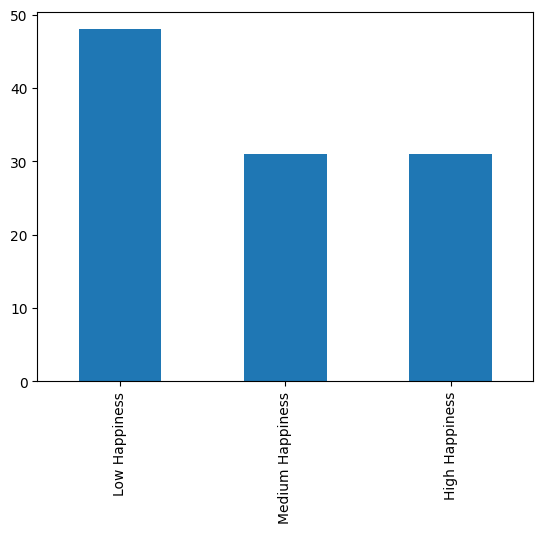

In [ ]:
#Bar Graph
dc['happiness_score'].value_counts(sort=False).plot(kind='bar')

One Hot Encoding

In [ ]:
encoder = OneHotEncoder()

encoder.fit(dc['Region'])

encoded_data = encoder.transform(dc['Region'])

print(encoded_data)


Normalization

In [ ]:
#Min-Max
scaler = MinMaxScaler()
dc_scaled = scaler.fit_transform(dc)

dc = dc.apply(lambda x: (x - x.mean()) / x.std())

Chi-square test

In [ ]:
# Create a contingency table of gender and customer loyalty
contingency_table = pd.crosstab(dc["Region"], dc["Happiness Rank"])

# Calculate the chi-square statistic and p-value
chi_square_statistic, p_value, dc_value, expected_values = stats.chi_contingency(contingency_table)

# Print the chi-square statistic and p-value
print(chi_square_statistic, p_value)

NameError: ignored

In [ ]:
# Create a new figure
fig = plt.figure()

# Plot the chi-square statistic on the x-axis and the p-value on the y-axis
plt.plot(chi_square_statistic, p_value)

# Add labels and titles to the graph
plt.xlabel("Chi-Square Statistic")
plt.ylabel("P-Value")
plt.title("Chi-Square Test")

# Show the graph
plt.show()
plt.boxplot([dc['Region'],dc['Happiness Rank']], labels=['Region', 'Happiness rank'])
plt.show()

Covariance matrix

In [ ]:
economy = dc['Economy (GDP per Capita)']
family = dc['Family']

covariance_matrix = np.cov(economy, family)
print(covariance_matrix)

Heatmap of covariance matrix

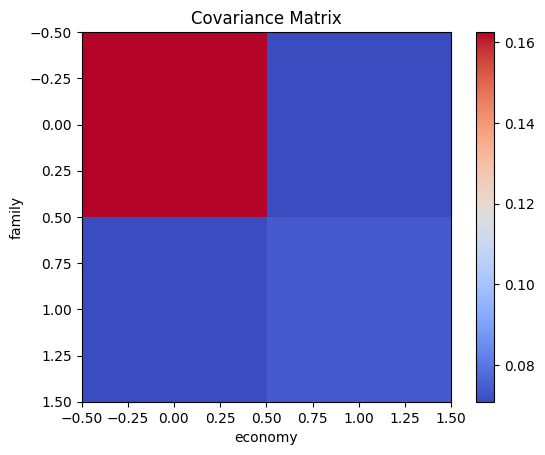

In [ ]:
plt.imshow(covariance_matrix, cmap="coolwarm")
plt.colorbar()
plt.xlabel("economy")
plt.ylabel("family")
plt.title("Covariance Matrix")
plt.show()
